# Random Forest Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Logan_housing.csv")

In [3]:
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


In [5]:
df.shape

(4110, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold Price         4110 non-null   int64 
 1   DOM                4110 non-null   int64 
 2   Garage Capacity    4110 non-null   int64 
 3   HOA Fee            4110 non-null   int64 
 4   Irregular Shape    4110 non-null   object
 5   Quadrant           4110 non-null   object
 6   School District    4110 non-null   object
 7   Sold Terms         4110 non-null   object
 8   Total Bedrooms     4110 non-null   int64 
 9   Total Bathrooms    4110 non-null   int64 
 10  Total Square Feet  4110 non-null   int64 
 11  Year Built         4110 non-null   int64 
 12  Zip                4110 non-null   int64 
 13  year_sold          4110 non-null   int64 
 14  month_sold         4110 non-null   int64 
 15  built_after_2000   4110 non-null   int64 
dtypes: int64(12), object(4)
memory usage: 513.

First we need to see if any data is missing

In [6]:
df.isnull().sum()

Sold Price           0
DOM                  0
Garage Capacity      0
HOA Fee              0
Irregular Shape      0
Quadrant             0
School District      0
Sold Terms           0
Total Bedrooms       0
Total Bathrooms      0
Total Square Feet    0
Year Built           0
Zip                  0
year_sold            0
month_sold           0
built_after_2000     0
dtype: int64

Looks good!
Now let's see if there are any duplicates!

In [10]:
df.duplicated().value_counts()

False    4108
True        2
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.nunique()

Sold Price           1217
DOM                   248
Garage Capacity        14
HOA Fee                96
Irregular Shape         2
Quadrant                4
School District         2
Sold Terms              6
Total Bedrooms          9
Total Bathrooms         7
Total Square Feet    2009
Year Built            136
Zip                    16
year_sold               3
month_sold             12
built_after_2000        2
dtype: int64

In [ ]:
# Random Forest can handle categorical data. But the algorithm cannot handle strings.
# We have to make sure that these are called ordinal categorical variables.

---

## Encode ordinal categorical features as an integer array.

In random forest we don't need to transfer the categorical variables into dummy variables (using one-hot-encoding). However, the algorithm is not able to handle ordinal data. We should transform ordinal categorical variables into quantitative variables. 

In [13]:
df.head(2)

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0


In [14]:
ordinal_categorical = ["Irregular Shape", "Quadrant", "School District", "Sold Terms", "Zip"]
# Actually, there is no need to convert the "Zip" feature as ordinal.

In [15]:
from sklearn.preprocessing import OrdinalEncoder

In [16]:
enc = OrdinalEncoder()
# By default it starts from 0. But you can change that default number.

In [18]:
df[ordinal_categorical] = enc.fit_transform(df[ordinal_categorical])

In [19]:
df.head(3)

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,0.0,1.0,0.0,2.0,3,1,1031,1974,12.0,2018,9,0
1,225000,6,2,0,0.0,1.0,0.0,1.0,4,2,2091,1995,12.0,2018,7,0
2,274900,14,2,0,0.0,1.0,0.0,1.0,3,1,2016,1980,12.0,2018,11,0


In [21]:
enc.categories_

[array(['No', 'Yes'], dtype=object),
 array(['NE', 'NW', 'SE', 'SW'], dtype=object),
 array(['Cache', 'Logan'], dtype=object),
 array(['Cash', 'Conventional', 'FHA', 'Other', 'USDA Rural Development',
        'VA'], dtype=object),
 array([84305, 84308, 84318, 84319, 84320, 84321, 84325, 84326, 84327,
        84328, 84332, 84333, 84335, 84338, 84339, 84341], dtype=int64)]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4108 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sold Price         4108 non-null   int64  
 1   DOM                4108 non-null   int64  
 2   Garage Capacity    4108 non-null   int64  
 3   HOA Fee            4108 non-null   int64  
 4   Irregular Shape    4108 non-null   float64
 5   Quadrant           4108 non-null   float64
 6   School District    4108 non-null   float64
 7   Sold Terms         4108 non-null   float64
 8   Total Bedrooms     4108 non-null   int64  
 9   Total Bathrooms    4108 non-null   int64  
 10  Total Square Feet  4108 non-null   int64  
 11  Year Built         4108 non-null   int64  
 12  Zip                4108 non-null   float64
 13  year_sold          4108 non-null   int64  
 14  month_sold         4108 non-null   int64  
 15  built_after_2000   4108 non-null   int64  
dtypes: float64(5), int64(11)

In [23]:
df.drop("built_after_2000", axis=1, inplace=True)

In [24]:
df.shape

(4108, 15)

Remember, with other machine learning models, we ended up with **58 features** using the same data set because we had to transform categorical variables into dummies. But with RF, there is only **14 features** to work with. 

### Scaling features
In random forest, we don't need to scale the features!! 

### Defining the variables and splitting the data

In [27]:
rand_state = 1000

In [26]:
y = df["Sold Price"]
X = df.drop(columns="Sold Price")

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = rand_state)

---

## Random Forest Regression with Sklearn

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
RF_regression = RandomForestRegressor(random_state= rand_state)
RF_regression.fit(X_train, y_train)

RandomForestRegressor(random_state=1000)

In [31]:
y_hat = RF_regression.predict(X_test)

In [33]:
predictions = pd.DataFrame({"y_test" : y_test, "y_hat" : y_hat, "Residuals" : y_hat - y_test})
predictions.head()

,y_test,y_hat,Residuals
4086,234500,262465.62,27965.62
2938,200685,208367.15,7682.15
175,345500,383041.50,37541.50
1940,230000,229644.23,-355.77
1763,299000,379370.31,80370.31


In [34]:
# Note : If you want to do time series make sure that the bootstrap = False.(default = True)

---
## Evaluating the model performance on test data

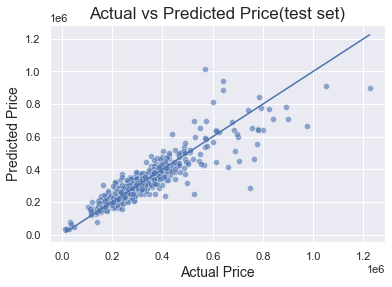

In [35]:
sns.scatterplot(x = y_test, y = y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel("Actual Price", fontsize=14)
plt.ylabel("Predicted Price", fontsize=14)
plt.title("Actual vs Predicted Price(test set)", fontsize=17)
plt.show()

# Maybe if you use a log transformation combined with random forest is going to do a better job.

In [36]:
RF_regression.score(X_test, y_test)

0.8379360050975464

Reminder: The $R^2$ using an SVM model was around 73%. Vanilla base RF is outperforming SVM. 

In [37]:
MSE_test = np.mean(np.square(y_test - y_hat))
RMSE_test = np.sqrt(MSE_test)
RMSE_test

46398.65197327561

---

## Tuning hyperparameters: 
### Gridsearch


In [56]:
my_param_grid = {"n_estimators" : [700, 800, 900], "max_features" : ["sqrt", "log2"], "max_depth" : [20, 30, 40]}
# "n_estimators" : How many trees you want to make?


In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid = GridSearchCV(estimator = RandomForestRegressor(random_state=rand_state),
                    param_grid = my_param_grid,
                    refit = True,
                    verbose = 2,
                    cv = 5,
                    n_jobs = -1)

In [59]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1000),
             n_jobs=-1,
             param_grid={'max_depth': [20, 30, 40],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [700, 800, 900]},
             verbose=2)

In [60]:
grid.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 800}

In [61]:
grid.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=800,
                      random_state=1000)

In [62]:
y_hat_optimized = grid.predict(X_test)

In [69]:
predictions["y_hat_optimized"] = y_hat_optimized
predictions["Optimized_Residuals"] = y_hat_optimized - y_test
predictions.head()

,y_test,y_hat,Residuals,y_hat_optimized,Optimized_Residuals
4086,234500,262465.62,27965.62,265141.571786,30641.571786
2938,200685,208367.15,7682.15,217634.624292,16949.624292
175,345500,383041.50,37541.50,390989.320647,45489.320647
1940,230000,229644.23,-355.77,217788.714966,-12211.285034
1763,299000,379370.31,80370.31,368478.323750,69478.323750


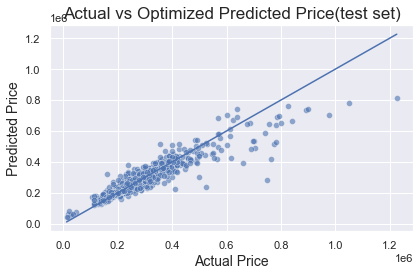

In [72]:
sns.scatterplot(x = y_test, y= y_hat_optimized, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel("Actual Price", fontsize=14)
plt.ylabel("Predicted Price", fontsize=14)
plt.title("Actual vs Optimized Predicted Price(test set)", fontsize=17)
plt.show()

In [71]:
grid.score(X_test, y_test)
# This is the test set R2 score.

0.8487822775149868

Compared to numbers before using gridsearch (R2= 0.8379 and RMSE= 46398), this is a slight improvement!

---
## Using Cross validation and OOB observations to estimate the $R^2$ in the test set. 

#### Cross validation
We will use Cross validation to estimate performance metrics in the test set. 

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
grid.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 800}

In [96]:
R2 = cross_val_score(estimator = RandomForestRegressor(max_depth = 20, max_features = "sqrt", n_estimators = 800),
                     X = X_train, 
                     y = y_train,
                     cv = 5,
                     scoring = "r2"
                    )

In [77]:
R2.mean()
# Actual Test Score.

0.7851088661422976

---

### Out-of-Bag errors!

We can show that on average, each bagged tree makes use of around 2/3 of the observations and 1/3 of them are not used to fit the model. These left out observations are called out-of-bag (OOB) observations. It turns out there is a very straightforward way to estimate the test errors using OOB observations. 

In [78]:
# I will give you an example about 2/3 ratio.

In [79]:
np.random.choice(100, size = 100)

array([30, 19, 91, 94, 90, 66, 80, 32, 76,  1, 53, 49, 45, 99, 62, 32, 90,
       18, 76, 26, 57, 51, 98, 23, 11,  0, 55, 64, 70, 17, 20, 98, 29, 95,
       87, 39, 80,  2, 84, 75, 86,  8, 78, 67, 59, 49, 24, 85, 73, 44, 96,
       53, 44, 82, 85, 62, 94, 76, 62, 68, 75, 37, 42,  0,  7, 40, 76, 94,
       96, 48, 73, 94, 70, 94, 12, 23, 39, 38, 26, 66, 93, 80, 18, 15,  3,
       87, 26, 59, 91, 42, 53, 65, 95, 13, 60, 73, 28,  6, 91, 17])

In [84]:
np.unique(np.random.choice(100, size=100)).size

65

In [88]:
2 / 3, 65 / 100

(0.6666666666666666, 0.65)

In [90]:
# Ok, we also look our model for this assumption.

In [91]:
RF_oob = RandomForestRegressor(max_depth=20, max_features="sqrt", n_estimators = 800, oob_score=True)
RF_oob.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=800,
                      oob_score=True)

In [92]:
RF_oob.oob_score_

0.7800694177031655

---

### Feature Importance

In [97]:
features = list(X_train.columns)
print(features)

['DOM', 'Garage Capacity', 'HOA Fee', 'Irregular Shape', 'Quadrant', 'School District', 'Sold Terms', 'Total Bedrooms', 'Total Bathrooms', 'Total Square Feet', 'Year Built', 'Zip', 'year_sold', 'month_sold']


In [98]:
RF_Regressor = RandomForestRegressor(n_estimators=800, max_features="sqrt", max_depth=20)
RF_Regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=800)

In [99]:
importance = RF_Regressor.feature_importances_
importance

array([0.04404868, 0.1532897 , 0.04045974, 0.01125707, 0.02003558,
       0.01867052, 0.02711726, 0.08621766, 0.11166644, 0.34900387,
       0.05724901, 0.02633901, 0.02804186, 0.02660359])

In [104]:
FIM = pd.DataFrame({"Features" : features, "Feature_importance" : importance})
FIM = FIM.sort_values(by="Feature_importance", ascending=False)
FIM

,Features,Feature_importance
9,Total Square Feet,0.349004
1,Garage Capacity,0.153290
8,Total Bathrooms,0.111666
7,Total Bedrooms,0.086218
10,Year Built,0.057249
0,DOM,0.044049
2,HOA Fee,0.040460
12,year_sold,0.028042
6,Sold Terms,0.027117
13,month_sold,0.026604


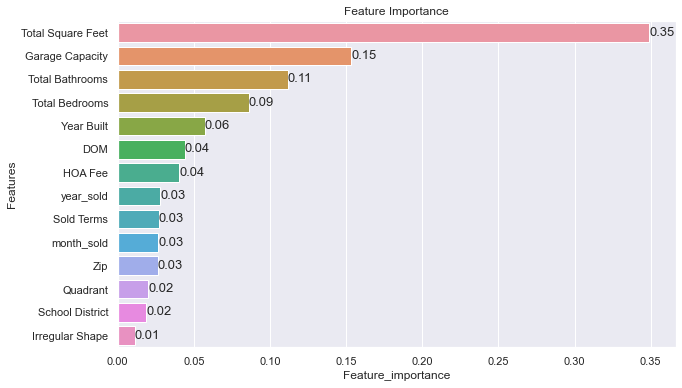

In [110]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(y = "Features", x = "Feature_importance", data =FIM)

plt.title("Feature Importance")
for i in ax.containers:
    ax.bar_label(i, fmt="%.2f", fontsize=13)
plt.show()

---
---

## Does more important feature mean more significant?

In [111]:
import statsmodels.api as sms

In [112]:
# With statsmodels, we need to manually add a constant to our dataset!
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

In [113]:
# Fit the model
model = sm.OLS(y_train, X_train_wc)
statsmodels_reg = model.fit()

In [115]:
statsmodels_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sold Price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     630.4
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:45:50   Log-Likelihood:                -35655.
No. Observations:                2875   AIC:                         7.134e+04
Df Residuals:                    2860   BIC:                         7.143e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.985e+07   2.75e+06    -18.151      0.000   -5.52e+07   -4.45e+07
DOM                 -55.1928     22.736     -2.428      0.015     -99.773     -10.612
Garage Capacity    1.942e+04   1286.898     15.088      0.000    1.69e+04    2.19e+04
HOA Fee               1.0187     17.429      0.058      0.953     -33.156      35.194
Irregular Shape    1.348e+04   3881.799      3.472      0.001    5866.477    2.11e+04
Quadrant           5508.5054   1044.865      5.272      0.000    3459.741    7557.270
School District   -7499.6621   2558.191     -2.932      0.003   -1.25e+04   -2483.577
Sold Terms         -660.7414    977.467     -0.676      0.499   -2577.353    1255.870
Total Bedrooms     1000.4834   1345.759      0.743      0.457   -1638.272    3639.239
Total Bathrooms    2022.8305   1987.773      1.018      0.309   -1874.783    5920.444
Total Square Feet    80.6931      1.752     46.065      0.000      77.258      84.128
Year Built          113.5147     45.989      2.468      0.014      23.340     203.689
Zip                 459.4171    268.915      1.708      0.088     -67.869     986.703
year_sold          2.459e+04   1361.057     18.065      0.000    2.19e+04    2.73e+04
month_sold         2835.0534    365.969      7.747      0.000    2117.464    3552.643
==============================================================================
Omnibus:                     3540.895   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1530235.354
Skew:                           6.092   Prob(JB):                         0.00
Kurtosis:                     115.364   Cond. No.                     9.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# When you look at the t values, these are not equal to feature importance.

In [116]:
# There is no one to one relationship between significance versus feature importance.
# But the takeaway from comparison of the t stats of the linear model and feature importance is that 
#  Linear model and Random Forest don't do same thing.

---

###  Additional links:


1. Decision Trees with sklearn: https://scikit-learn.org/stable/modules/tree.html
2. Ensemble learning with sklearn: https://scikit-learn.org/stable/modules/ensemble.html
3. graphviz: this is used for Tree visualization: http://graphviz.org/
4. Out of Bag errors for random forest: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py